In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Analisi procedura ottimizzazione

In [ ]:
l1_path = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/opt_path/L1_reg.csv")
l2_path = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/opt_path/L2_reg.csv")
drop_path = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/opt_path/dropout.csv")

In [ ]:
def maximizer(data):

  best_data = []
  
  best_data.append(data[1]) 

  smaller = data[1]

  
  for i in range(len(data)-1):
    
    if data[i+1] < smaller : 

      best_data.append(data[i+1])

      smaller = data[i+1]

    else:

      best_data.append(smaller)

  
  return best_data

In [ ]:
l1_path['best_value'] = maximizer(l1_path['value'])
l2_path['best_value'] = maximizer(l2_path['value'])

In [ ]:
drop_path['best_value'] = maximizer(drop_path['value'])

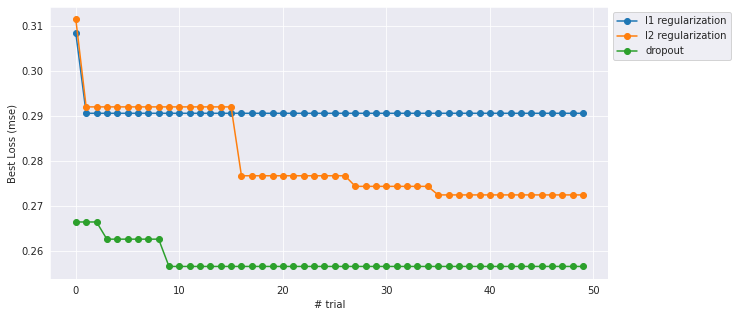

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot('number', 'best_value', data=l1_path, linestyle='-', marker='o', label = "l1 regularization")
plt.plot('number', 'best_value', data=l2_path, linestyle='-', marker='o', label = "l2 regularization")
plt.plot('number', 'best_value', data=drop_path, linestyle='-', marker='o', label = "dropout")
plt.xlabel("# trial")
plt.ylabel("Best Loss (mse)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Training Curve

In [ ]:
perf_opt_drop = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/Dropout/perf_opt_dropout.csv")
perf_no_opt_drop = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/Dropout/perf_no_opt_dropout.csv")

perf_opt_l1 = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/perf_opt_l1.csv")
perf_no_opt_l1 = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/perf_no_opt_l1.csv")

perf_opt_l2 = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L2_reg/perf_opt_l2.csv")
perf_no_opt_l2 = pd.read_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L2_reg/perf_no_opt_l2.csv")

(0.25, 0.9)

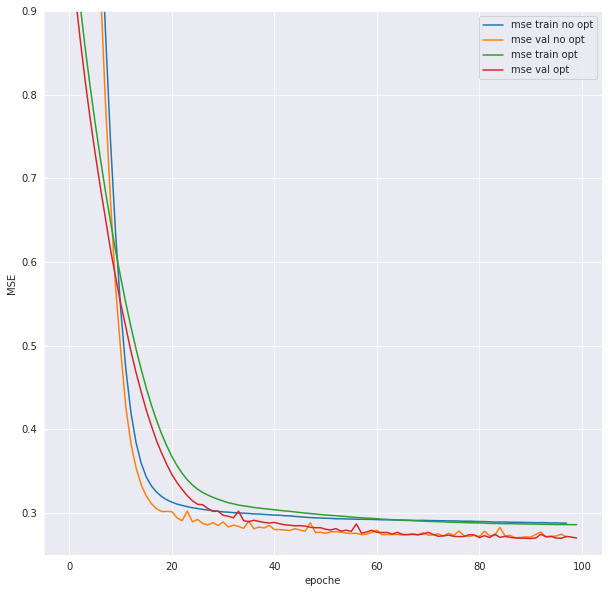

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(perf_no_opt_l1['epochs'], perf_no_opt_l1['loss'], label = "mse train no opt")
plt.plot(perf_no_opt_l1['epochs'], perf_no_opt_l1['val_loss'],label = "mse val no opt")
plt.plot(perf_opt_l1['epochs'], perf_opt_l1['loss'], label = "mse train opt")
plt.plot(perf_opt_l1['epochs'], perf_opt_l1['val_loss'], label = "mse val opt")
plt.xlabel("epoche")
plt.ylabel("MSE")
plt.legend()
plt.ylim((0.25, 0.9))

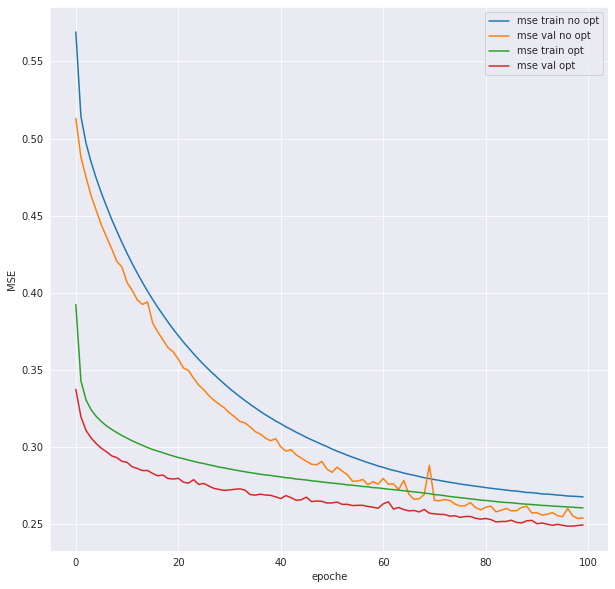

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(perf_no_opt_l2['epochs'], perf_no_opt_l2['loss'], label = "mse train no opt")
plt.plot(perf_no_opt_l2['epochs'], perf_no_opt_l2['val_loss'], label = "mse val no opt")
plt.plot(perf_opt_l2['epochs'], perf_opt_l2['loss'], label = "mse train opt")
plt.plot(perf_opt_l2['epochs'], perf_opt_l2['val_loss'], label = "mse val opt")
plt.ylabel("MSE")
plt.xlabel("epoche")
plt.legend()

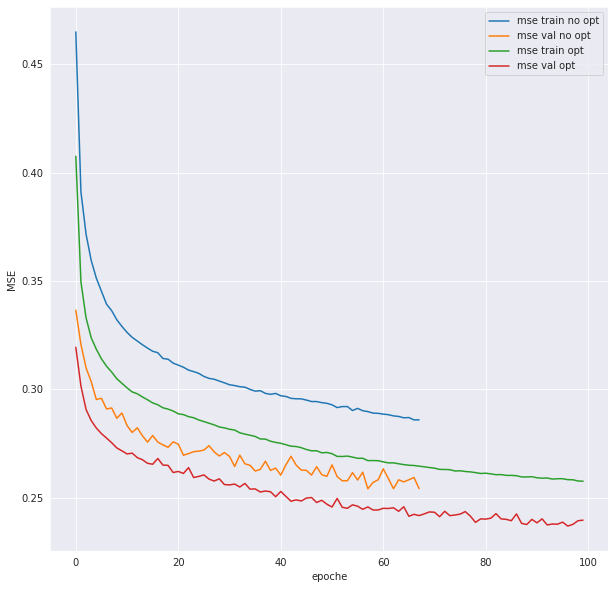

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(perf_no_opt_drop['epochs'], perf_no_opt_drop['loss'], label = "mse train no opt")
plt.plot(perf_no_opt_drop['epochs'], perf_no_opt_drop['val_loss'], label = "mse val no opt")
plt.plot(perf_opt_drop['epochs'], perf_opt_drop['loss'], label = "mse train opt")
plt.plot(perf_opt_drop['epochs'], perf_opt_drop['val_loss'], label = "mse val opt")
plt.xlabel("epoche")
plt.ylabel("MSE")
plt.legend()

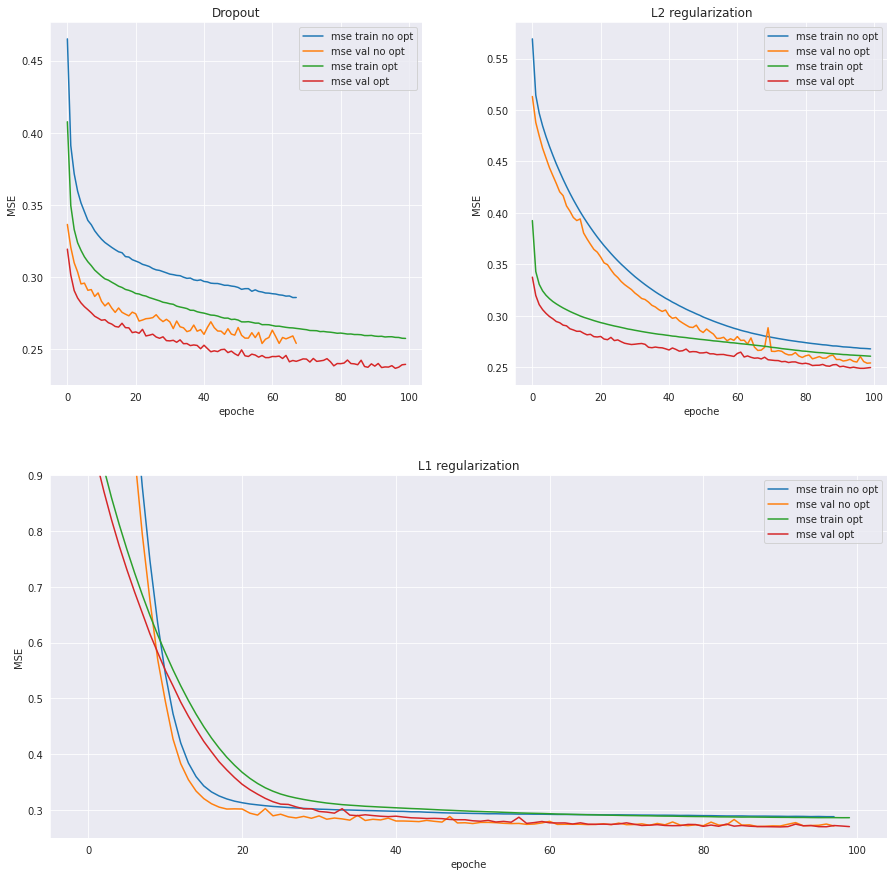

In [ ]:

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
sub1 = fig.add_subplot(2,2,1)
sub1.plot(perf_no_opt_drop['epochs'], perf_no_opt_drop['loss'], label = "mse train no opt")
sub1.plot(perf_no_opt_drop['epochs'], perf_no_opt_drop['val_loss'], label = "mse val no opt")
sub1.plot(perf_opt_drop['epochs'], perf_opt_drop['loss'], label = "mse train opt")
sub1.plot(perf_opt_drop['epochs'], perf_opt_drop['val_loss'], label = "mse val opt")
sub1.set(xlabel = "epoche", ylabel = "MSE", title = "Dropout")
sub1.legend()

sub2 = fig.add_subplot(2,2,2)
sub2.plot(perf_no_opt_l2['epochs'], perf_no_opt_l2['loss'], label = "mse train no opt")
sub2.plot(perf_no_opt_l2['epochs'], perf_no_opt_l2['val_loss'], label = "mse val no opt")
sub2.plot(perf_opt_l2['epochs'], perf_opt_l2['loss'], label = "mse train opt")
sub2.plot(perf_opt_l2['epochs'], perf_opt_l2['val_loss'], label = "mse val opt")
sub2.set(xlabel = "epoche", ylabel = "MSE", title = "L2 regularization")
sub2.legend()

sub3 = fig.add_subplot(2,2,(3,4))
sub3.plot(perf_no_opt_l1['epochs'], perf_no_opt_l1['loss'], label = "mse train no opt")
sub3.plot(perf_no_opt_l1['epochs'], perf_no_opt_l1['val_loss'],label = "mse val no opt")
sub3.plot(perf_opt_l1['epochs'], perf_opt_l1['loss'], label = "mse train opt")
sub3.plot(perf_opt_l1['epochs'], perf_opt_l1['val_loss'], label = "mse val opt")
sub3.set(xlabel = "epoche", ylabel = "MSE", title = "L1 regularization", ylim = (0.25, 0.9))
sub3.legend()

Confronto performance vs numero parametri

In [ ]:
model_no_opt_l1 = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/model_no_opt_l1.h5")
model_opt_l1 = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/model_opt_l1.h5")

model_no_opt_l2 = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L2_reg/model_no_opt_l2.h5")
model_opt_l2 = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L2_reg/model_opt_l2.h5")

model_no_opt_drop = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/Dropout/model_no_opt_dropout.h5")
model_opt_drop = tf.keras.models.load_model("/content/drive/MyDrive/AML_project/modelli/modelli salvati/Dropout/model_opt_dropout.h5")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AML_project/train_manipulated_integrated.csv")

y_train = train['trip_duration'].values.reshape(-1, 1)

X_train = train.drop(columns = ['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.30,
                                                  random_state = 1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15,
                                                  random_state = 1234)

X_train_to_stand = X_train[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_train_not_stand = X_train.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values


X_val_to_stand = X_val[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_val_not_stand = X_val.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values

X_test_to_stand = X_test[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_test_not_stand = X_test.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values

scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train_to_stand)
y_train_stand = scaler.fit(y_train).transform(y_train)

X_val_stand = scaler.fit(X_train_to_stand).transform(X_val_to_stand)
y_val_stand = scaler.fit(y_train).transform(y_val)

X_test_stand = scaler.fit(X_train_to_stand).transform(X_test_to_stand)
y_test_stand = scaler.fit(y_train).transform(y_test)

X_train = np.concatenate((X_train_stand, X_train_not_stand), axis = 1)
X_val = np.concatenate((X_val_stand, X_val_not_stand), axis = 1)
X_test = np.concatenate((X_test_stand, X_test_not_stand), axis = 1)

y_train = y_train_stand
y_val = y_val_stand
y_test = y_test_stand

Di seguito si valutano i modelli in termini di MSE

In [ ]:
#l1 regularization

res_no_opt_l1_train = model_no_opt_l1.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_no_opt_l1_val = model_no_opt_l1.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_no_opt_l1_test = model_no_opt_l1.evaluate(X_test, y_test, batch_size=128, verbose = 0)

res_opt_l1_train = model_opt_l1.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_opt_l1_val = model_opt_l1.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_opt_l1_test = model_opt_l1.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [ ]:
#l2 regularization

res_no_opt_l2_train = model_no_opt_l2.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_no_opt_l2_val = model_no_opt_l2.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_no_opt_l2_test = model_no_opt_l2.evaluate(X_test, y_test, batch_size=128, verbose=0)

res_opt_l2_train = model_opt_l2.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_opt_l2_val = model_opt_l2.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_opt_l2_test = model_opt_l2.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [ ]:
#dropout

res_no_opt_drop_train = model_no_opt_drop.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_no_opt_drop_val = model_no_opt_drop.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_no_opt_drop_test = model_no_opt_drop.evaluate(X_test, y_test, batch_size=128, verbose=0)

res_opt_drop_train = model_opt_drop.evaluate(X_train, y_train, batch_size=128, verbose=0)
res_opt_drop_val = model_opt_drop.evaluate(X_val, y_val, batch_size=128, verbose=0)
res_opt_drop_test = model_opt_drop.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [ ]:
perf_no_opt = pd.DataFrame({'L1_reg':[res_no_opt_l1_train[0], res_no_opt_l1_val[0],
                                      res_no_opt_l1_test[0]], 
                            'l2_reg': [res_no_opt_l2_train[0], res_no_opt_l2_val[0],
                                      res_no_opt_l2_test[0]],
                                       'dropout':[res_no_opt_drop_train[0], 
                                                  res_no_opt_drop_val[0],
                                      res_no_opt_drop_test[0]]},
                           index = ['Train', 'Validation', 'Test'])

In [ ]:
np.round(perf_no_opt, 4)

,L1_reg,l2_reg,dropout
Train,0.2858,0.2659,0.2682
Validation,0.2702,0.2541,0.2541
Test,0.2814,0.2638,0.2649


In [ ]:
perf_opt = pd.DataFrame({'L1_reg':[res_opt_l1_train[0], res_opt_l1_val[0],
                                      res_opt_l1_test[0]], 
                            'l2_reg': [res_opt_l2_train[0], res_opt_l2_val[0],
                                      res_opt_l2_test[0]],
                                       'dropout':[res_opt_drop_train[0], 
                                                  res_opt_drop_val[0],
                                      res_opt_drop_test[0]]},
                           index = ['Train', 'Validation', 'Test'])

In [ ]:
np.round(perf_opt, 4)

,L1_reg,l2_reg,dropout
Train,0.2853,0.2598,0.2520
Validation,0.2701,0.2497,0.2396
Test,0.2808,0.2592,0.2496


In [ ]:
#numero parametri del modello

n_params_no_opt_l1 = model_no_opt_l1.count_params()
n_params_opt_l1 = model_opt_l1.count_params()

n_params_no_opt_l2 = model_no_opt_l2.count_params()
n_params_opt_l2 = model_opt_l2.count_params()

n_params_no_opt_drop = model_no_opt_drop.count_params()
n_params_opt_drop = model_opt_drop.count_params()

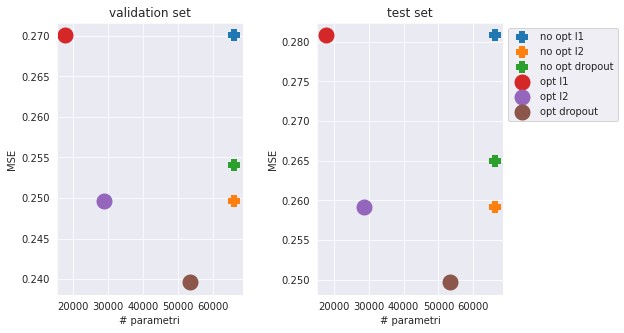

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize = (8, 5))
plt.subplots_adjust(wspace=0.4)
axs[0,].scatter(n_params_no_opt_l1, res_opt_l1_val[0], linewidth = 12, label = "no opt l1", marker = "+")
axs[0].scatter(n_params_no_opt_l2, res_opt_l2_val[0], linewidth = 12, label = "no opt l2", marker = "+")
axs[0].scatter(n_params_no_opt_drop, res_no_opt_drop_val[0], linewidth = 12, label = "no opt dropout", marker = "+")
axs[0].scatter(n_params_opt_l1, res_opt_l1_val[0], linewidth = 10, label = "opt l1")
axs[0].scatter(n_params_opt_l2, res_opt_l2_val[0], linewidth = 10, label = "opt l2")
axs[0].scatter(n_params_opt_drop, res_opt_drop_val[0], linewidth = 10, label = "opt dropout")
axs[0].set(xlabel = "# parametri", ylabel = "MSE", title = "validation set")


axs[1].scatter(n_params_no_opt_l1, res_opt_l1_test[0], linewidth = 12, label = "no opt l1", marker = "+")
axs[1].scatter(n_params_no_opt_l2, res_opt_l2_test[0], linewidth = 12, label = "no opt l2", marker = "+")
axs[1].scatter(n_params_no_opt_drop, res_no_opt_drop_test[0], linewidth = 12, label = "no opt dropout", marker = "+")
axs[1].scatter(n_params_opt_l1, res_opt_l1_test[0], linewidth = 10, label = "opt l1")
axs[1].scatter(n_params_opt_l2, res_opt_l2_test[0], linewidth = 10, label = "opt l2")
axs[1].scatter(n_params_opt_drop, res_opt_drop_test[0], linewidth = 10, label = "opt dropout")
axs[1].set(xlabel = "# parametri", ylabel = "MSE", title = "test set")
axs[1].legend(bbox_to_anchor=(1, 1), loc='upper left')